In [1]:
import numpy as np
import gzip
import urllib.request
import tarfile
import random
import string
from copy import deepcopy
import pandas as pd
from collections import defaultdict
import json
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_json("winemag-data-130k-v2.json")

In [3]:
df_wine.columns.values

array(['country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype=object)

In [4]:
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df_wine['points'].mean()

88.44713820775404

In [6]:
df_wine['taster_name'].value_counts().count()

19

In [7]:
df_wine['title'].value_counts().count()

118840

In [8]:
df_wine['winery'].value_counts().count()

16757

In [9]:
df_wine['country'].value_counts().count()

43

In [10]:
def continent(country):
    if country in ['US', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['France', 'Italy', 'Spain', 'Portugal', 'Austria', 'Germany', 'Greece', 'Hungary', 'Bulgaria', 'Romania'
                     , 'Turkey', 'Slovenia', 'Georgia', 'England', 'Croatia', 'Moldova', 'Ukraine', 'Macedonia', 'Czech Republic'
                     , 'Serbia', 'Cyprus', 'Switzerland', 'Luxembourg', 'Bosnia and Herzegovina', 'Armenia', 'Slovakia']:
        return 'Europe'
    elif country in ['Chile', 'Argentina', 'Uruguay', 'Brazil', 'Peru']:
        return 'South America'
    elif country in ['Israel', 'India', 'China']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['South Africa', 'Egypt', 'Morocco']:
        return 'Africa'
    else:
        return np.nan

In [11]:
df_wine['continent'] = df_wine['country'].apply(continent)

In [12]:
def getYear(string):
    splitStr = []
    splitStr = string.split(' ')
    for a in splitStr:
        if a.isnumeric() == True:
            if int(a) >= 1934 and int(a) <= 2020:
                return a
            else:
                continue
        else:
            continue
    return np.nan

In [13]:
df_wine['year'] = df_wine['title'].apply(getYear)

In [14]:
def getAge(year):
    if type(year) == float:
        return np.nan
    else:
        age = 2018 - int(year)
        return age

In [15]:
df_wine['age'] = df_wine['year'].apply(getAge)

In [16]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,continent,year,age
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europe,2013,5.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europe,2011,7.0
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,North America,2013,5.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,North America,2013,5.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,North America,2012,6.0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,None,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europe,2011,7.0
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,None,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Europe,2013,5.0
7,France,This dry and restrained wine offers spice in p...,None,87,24.0,Alsace,Alsace,None,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,Europe,2012,6.0
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,None,None,Anna Lee C. Iijima,None,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,Europe,2013,5.0
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,None,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Europe,2012,6.0


In [17]:
taster = []
taster = df_wine['taster_name'].value_counts().keys().to_list()
average_taster = []
for a in taster:
    average_taster.append(df_wine[df_wine['taster_name'] == a].points.mean())
df_taster = pd.DataFrame({'taster_name':taster, 'points':average_taster})
df_taster = df_taster.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_taster = df_taster.set_index('taster_name')

In [18]:
df_taster

,points
taster_name,
Anne Krebiehl MW,90.562551
Matt Kettmann,90.008686
Virginie Boone,89.213379
Mike DeSimone,89.101167
Paul Gregutt,89.082564
Kerin O’Keefe,88.867947
Sean P. Sullivan,88.755739
Roger Voss,88.708003
Jim Gordon,88.626287


In [19]:
continent = []
continent = df_wine['continent'].value_counts().keys().to_list()
average_continent = []
for a in continent:
    average_continent.append(df_wine[df_wine['continent'] == a].points.mean())
df_continent = pd.DataFrame({'continent':continent, 'points':average_continent})
df_continent = df_continent.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_continent = df_continent.set_index('continent')

In [20]:
df_continent

,points
continent,
Europe,88.608982
North America,88.563276
Asia,88.502913
Oceania,88.475454
Africa,88.063636
South America,86.577583


In [21]:
country = []
country = df_wine['country'].value_counts().keys().to_list()
average_country = []
for a in country:
    average_country.append(df_wine[df_wine['country'] == a].points.mean())
df_country = pd.DataFrame({'country':country, 'points':average_country})
df_country = df_country.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_country = df_country.set_index('country')

In [22]:
df_country

,points
country,
England,91.581081
India,90.222222
Austria,90.101345
Germany,89.851732
Canada,89.369650
Hungary,89.191781
China,89.000000
France,88.845109
Luxembourg,88.666667


In [23]:
age = []
age = df_wine['age'].value_counts().keys().to_list()
average_age = []
for a in age:
    average_age.append(df_wine[df_wine['age'] == a].points.mean())
df_age = pd.DataFrame({'age':age, 'points':average_age})
df_age = df_age.sort_values(by=['age'], ascending=True).reset_index(drop=True)
df_age = df_age.set_index('age')

In [24]:
df_age

,points
age,
1.0,85.545455
2.0,87.687077
3.0,88.519200
4.0,88.867283
5.0,88.952189
6.0,88.774052
7.0,88.277672
8.0,88.262020
9.0,88.334987


In [25]:
price = []
price = df_wine['price'].value_counts().keys().to_list()
average_price = []
for a in price:
    average_price.append(df_wine[df_wine['price'] == a].points.mean())
df_price = pd.DataFrame({'price':price, 'points':average_price})
df_price = df_price.sort_values(by=['price'], ascending=True).reset_index(drop=True)
df_price = df_price.set_index('price')

In [26]:
df_price

,points
price,
4.0,84.272727
5.0,83.586957
6.0,84.341667
7.0,84.450346
8.0,84.628924
9.0,85.036594
10.0,85.239314
11.0,85.471331
12.0,85.807067


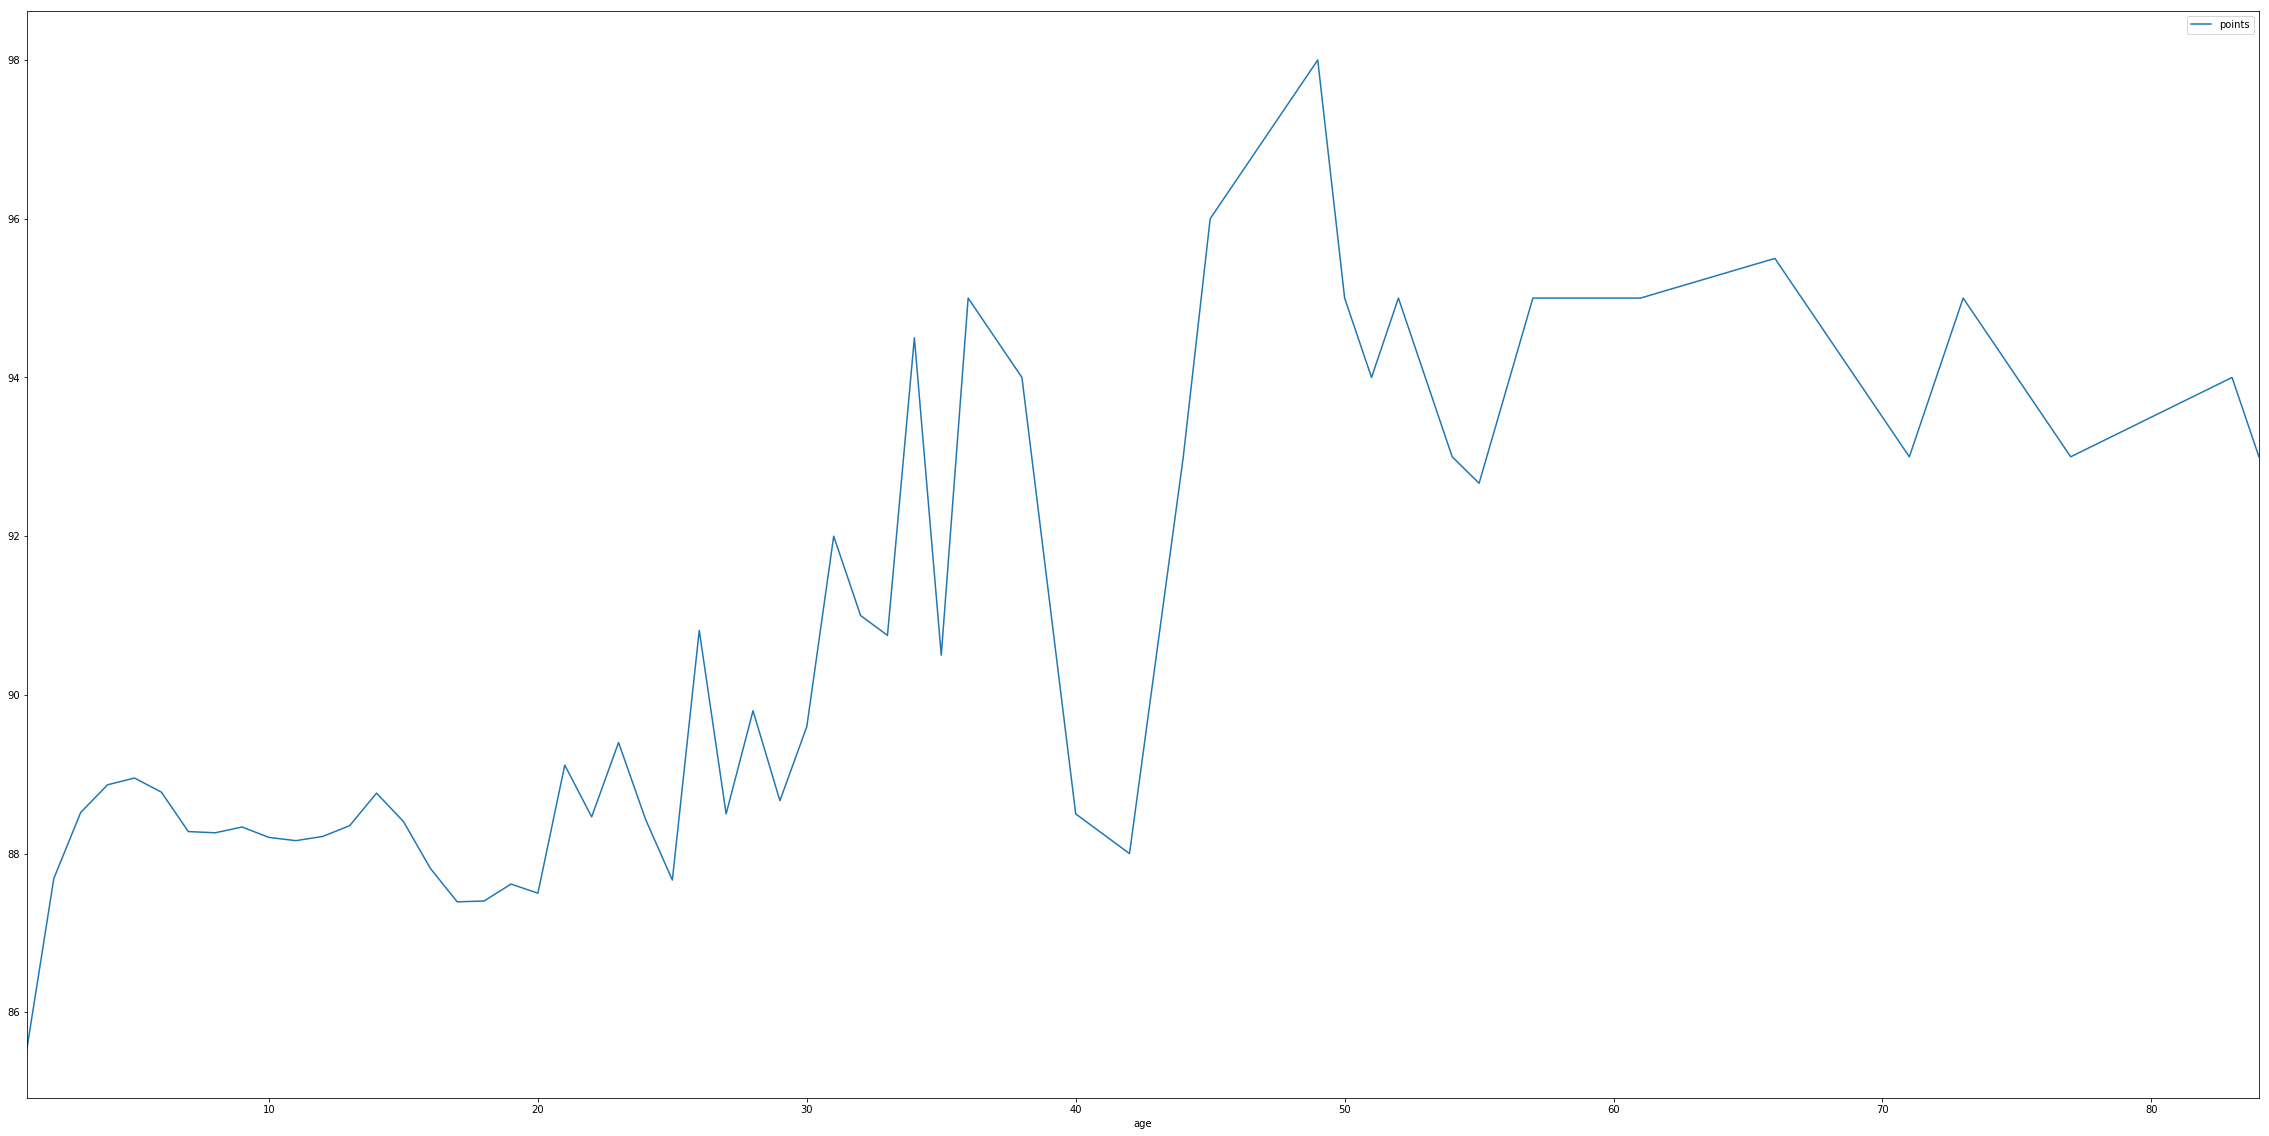

In [27]:
df_age.plot(kind='line', figsize=(40,20))

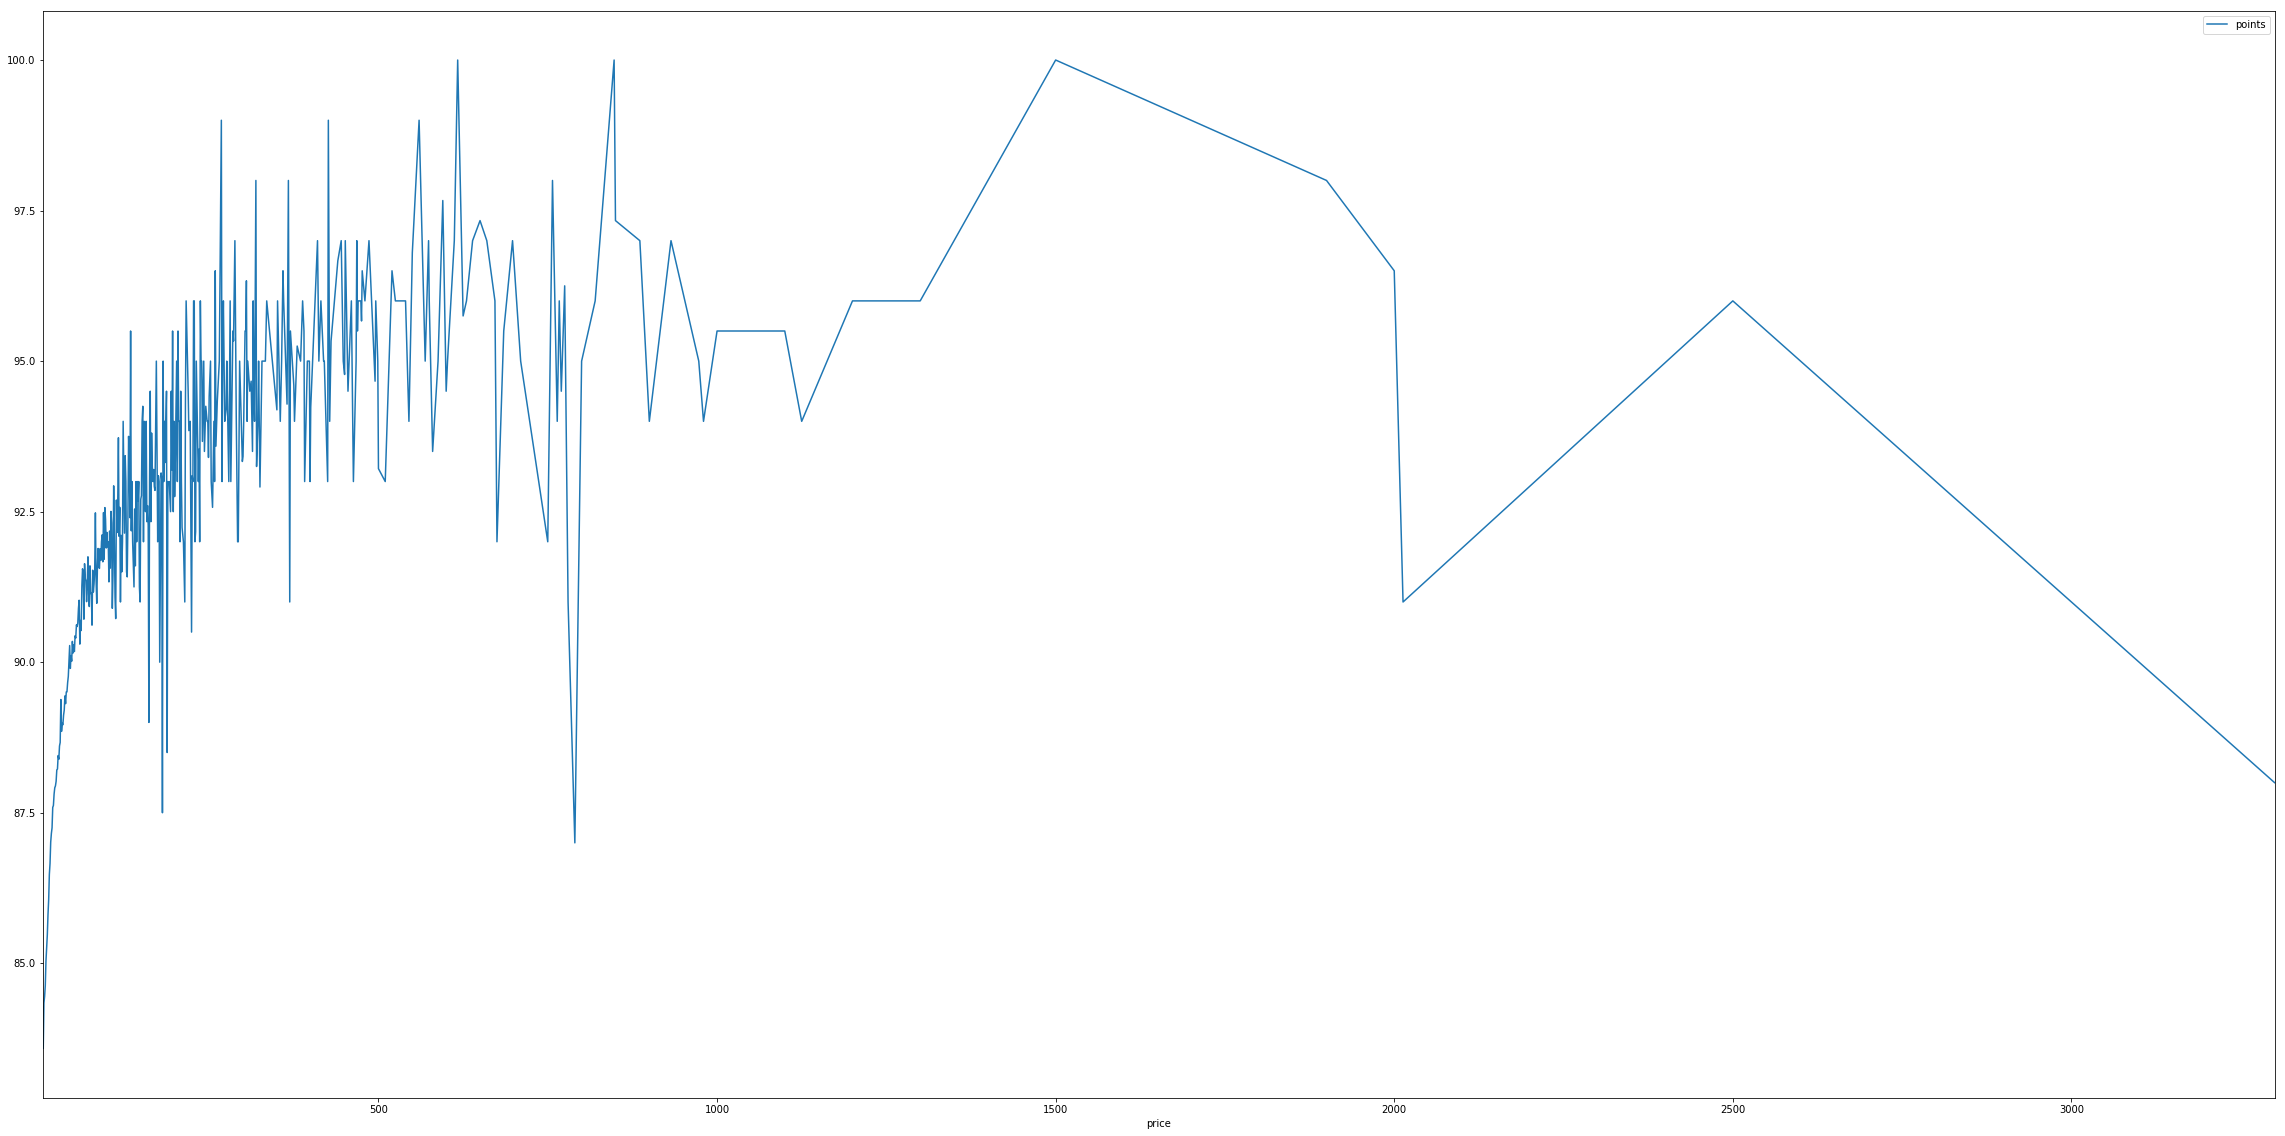

In [28]:
df_price.plot(kind='line', figsize=(40,20))

In [29]:
df_taster

,points
taster_name,
Anne Krebiehl MW,90.562551
Matt Kettmann,90.008686
Virginie Boone,89.213379
Mike DeSimone,89.101167
Paul Gregutt,89.082564
Kerin O’Keefe,88.867947
Sean P. Sullivan,88.755739
Roger Voss,88.708003
Jim Gordon,88.626287


In [31]:
df_voss = df_wine.loc[df_wine['taster_name'] == 'Roger Voss']
df_voss = df_voss.reset_index(drop=True)

In [32]:
winery_voss = []
winery_voss = df_voss['winery'].value_counts().keys().to_list()
average_winery_voss = []
for a in winery_voss:
    average_winery_voss.append(df_voss[df_voss['winery'] == a].points.mean())
df_winery_voss = pd.DataFrame({'winery':winery_voss, 'points':average_winery_voss})
df_winery_voss = df_winery_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_voss = df_winery_voss.set_index('winery')

In [52]:
variety_voss = []
variety_voss = df_voss['variety'].value_counts().keys().to_list()
average_variety_voss = []
for a in variety_voss:
    average_variety_voss.append(df_voss[df_voss['variety'] == a].points.mean())
df_variety_voss = pd.DataFrame({'variety':variety_voss, 'points':average_variety_voss})
df_variety_voss = df_variety_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_voss = df_variety_voss.set_index('variety')

In [34]:
df_schachner = df_wine.loc[df_wine['taster_name'] == 'Michael Schachner']
df_schachner = df_schachner.reset_index(drop=True)

In [54]:
winery_schachner = []
winery_schachner = df_schachner['winery'].value_counts().keys().to_list()
average_winery_schachner = []
for a in winery_schachner:
    average_winery_schachner.append(df_schachner[df_schachner['winery'] == a].points.mean())
df_winery_schachner = pd.DataFrame({'winery':winery_schachner, 'points':average_winery_schachner})
df_winery_schachner = df_winery_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_schachner = df_winery_schachner.set_index('winery')

In [55]:
variety_schachner = []
variety_schachner = df_schachner['variety'].value_counts().keys().to_list()
average_variety_schachner = []
for a in variety_schachner:
    average_variety_schachner.append(df_schachner[df_schachner['variety'] == a].points.mean())
df_variety_schachner = pd.DataFrame({'variety':variety_schachner, 'points':average_variety_schachner})
df_variety_schachner = df_variety_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_schachner = df_variety_schachner.set_index('variety')

In [35]:
df_keefe = df_wine.loc[df_wine['taster_name'] == 'Kerin O’Keefe']
df_keefe = df_keefe.reset_index(drop=True)

In [56]:
winery_keefe = []
winery_keefe = df_keefe['winery'].value_counts().keys().to_list()
average_winery_keefe = []
for a in winery_keefe:
    average_winery_keefe.append(df_keefe[df_keefe['winery'] == a].points.mean())
df_winery_keefe = pd.DataFrame({'winery':winery_keefe, 'points':average_winery_keefe})
df_winery_keefe = df_winery_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_keefe = df_winery_keefe.set_index('winery')

In [57]:
variety_keefe = []
variety_keefe = df_keefe['variety'].value_counts().keys().to_list()
average_variety_keefe = []
for a in variety_keefe:
    average_variety_keefe.append(df_keefe[df_keefe['variety'] == a].points.mean())
df_variety_keefe = pd.DataFrame({'variety':variety_keefe, 'points':average_variety_keefe})
df_variety_keefe = df_variety_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_keefe = df_variety_keefe.set_index('variety')

In [36]:
df_boone = df_wine.loc[df_wine['taster_name'] == 'Virginie Boone']
df_boone = df_boone.reset_index(drop=True)

In [59]:
winery_boone = []
winery_boone = df_boone['winery'].value_counts().keys().to_list()
average_winery_boone = []
for a in winery_boone:
    average_winery_boone.append(df_boone[df_boone['winery'] == a].points.mean())
df_winery_boone = pd.DataFrame({'winery':winery_boone, 'points':average_winery_boone})
df_winery_boone = df_winery_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_boone = df_winery_boone.set_index('winery')

In [60]:
variety_boone = []
variety_boone = df_boone['variety'].value_counts().keys().to_list()
average_variety_boone = []
for a in variety_boone:
    average_variety_boone.append(df_boone[df_boone['variety'] == a].points.mean())
df_variety_boone = pd.DataFrame({'variety':variety_boone, 'points':average_variety_boone})
df_variety_boone = df_variety_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_boone = df_variety_boone.set_index('variety')

In [37]:
df_gregutt = df_wine.loc[df_wine['taster_name'] == 'Paul Gregutt']
df_gregutt = df_gregutt.reset_index(drop=True)

In [61]:
winery_gregutt = []
winery_gregutt = df_gregutt['winery'].value_counts().keys().to_list()
average_winery_gregutt = []
for a in winery_gregutt:
    average_winery_gregutt.append(df_gregutt[df_gregutt['winery'] == a].points.mean())
df_winery_gregutt = pd.DataFrame({'winery':winery_gregutt, 'points':average_winery_gregutt})
df_winery_gregutt = df_winery_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gregutt = df_winery_gregutt.set_index('winery')

In [62]:
variety_gregutt = []
variety_gregutt = df_gregutt['variety'].value_counts().keys().to_list()
average_variety_gregutt = []
for a in variety_gregutt:
    average_variety_gregutt.append(df_gregutt[df_gregutt['variety'] == a].points.mean())
df_variety_gregutt = pd.DataFrame({'variety':variety_gregutt, 'points':average_variety_gregutt})
df_variety_gregutt = df_variety_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gregutt = df_variety_gregutt.set_index('variety')

In [38]:
df_kettmann = df_wine.loc[df_wine['taster_name'] == 'Matt Kettmann']
df_kettmann = df_kettmann.reset_index(drop=True)

In [63]:
winery_kettmann = []
winery_kettmann = df_kettmann['winery'].value_counts().keys().to_list()
average_winery_kettmann = []
for a in winery_kettmann:
    average_winery_kettmann.append(df_kettmann[df_kettmann['winery'] == a].points.mean())
df_winery_kettmann = pd.DataFrame({'winery':winery_kettmann, 'points':average_winery_kettmann})
df_winery_kettmann = df_winery_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_kettmann = df_winery_kettmann.set_index('winery')

In [64]:
variety_kettmann = []
variety_kettmann = df_kettmann['variety'].value_counts().keys().to_list()
average_variety_kettmann = []
for a in variety_kettmann:
    average_variety_kettmann.append(df_kettmann[df_kettmann['variety'] == a].points.mean())
df_variety_kettmann = pd.DataFrame({'variety':variety_kettmann, 'points':average_variety_kettmann})
df_variety_kettmann = df_variety_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_kettmann = df_variety_kettmann.set_index('variety')

In [39]:
df_czerwinski = df_wine.loc[df_wine['taster_name'] == 'Joe Czerwinski']
df_czerwinski = df_czerwinski.reset_index(drop=True)

In [65]:
winery_czerwinski = []
winery_czerwinski = df_czerwinski['winery'].value_counts().keys().to_list()
average_winery_czerwinski = []
for a in winery_czerwinski:
    average_winery_czerwinski.append(df_czerwinski[df_czerwinski['winery'] == a].points.mean())
df_winery_czerwinski = pd.DataFrame({'winery':winery_czerwinski, 'points':average_winery_czerwinski})
df_winery_czerwinski = df_winery_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_czerwinski = df_winery_czerwinski.set_index('winery')

In [66]:
variety_czerwinski = []
variety_czerwinski = df_czerwinski['variety'].value_counts().keys().to_list()
average_variety_czerwinski = []
for a in variety_czerwinski:
    average_variety_czerwinski.append(df_czerwinski[df_czerwinski['variety'] == a].points.mean())
df_variety_czerwinski = pd.DataFrame({'variety':variety_czerwinski, 'points':average_variety_czerwinski})
df_variety_czerwinski = df_variety_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_czerwinski = df_variety_czerwinski.set_index('variety')

In [40]:
df_sullivan = df_wine.loc[df_wine['taster_name'] == 'Sean P. Sullivan']
df_sullivan = df_sullivan.reset_index(drop=True)

In [67]:
winery_sullivan = []
winery_sullivan = df_sullivan['winery'].value_counts().keys().to_list()
average_winery_sullivan = []
for a in winery_sullivan:
    average_winery_sullivan.append(df_sullivan[df_sullivan['winery'] == a].points.mean())
df_winery_sullivan = pd.DataFrame({'winery':winery_sullivan, 'points':average_winery_sullivan})
df_winery_sullivan = df_winery_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_sullivan = df_winery_sullivan.set_index('winery')

In [68]:
variety_sullivan = []
variety_sullivan = df_sullivan['variety'].value_counts().keys().to_list()
average_variety_sullivan = []
for a in variety_sullivan:
    average_variety_sullivan.append(df_sullivan[df_sullivan['variety'] == a].points.mean())
df_variety_sullivan = pd.DataFrame({'variety':variety_sullivan, 'points':average_variety_sullivan})
df_variety_sullivan = df_variety_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_sullivan = df_variety_sullivan.set_index('variety')

In [41]:
df_iijima = df_wine.loc[df_wine['taster_name'] == 'Anna Lee C. Iijima']
df_iijima = df_iijima.reset_index(drop=True)

In [69]:
winery_iijima = []
winery_iijima = df_iijima['winery'].value_counts().keys().to_list()
average_winery_iijima = []
for a in winery_iijima:
    average_winery_iijima.append(df_iijima[df_iijima['winery'] == a].points.mean())
df_winery_iijima = pd.DataFrame({'winery':winery_iijima, 'points':average_winery_iijima})
df_winery_iijima = df_winery_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_iijima = df_winery_iijima.set_index('winery')

In [70]:
variety_iijima = []
variety_iijima = df_iijima['variety'].value_counts().keys().to_list()
average_variety_iijima = []
for a in variety_iijima:
    average_variety_iijima.append(df_iijima[df_iijima['variety'] == a].points.mean())
df_variety_iijima = pd.DataFrame({'variety':variety_iijima, 'points':average_variety_iijima})
df_variety_iijima = df_variety_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_iijima = df_variety_iijima.set_index('variety')

In [42]:
df_gordon = df_wine.loc[df_wine['taster_name'] == 'Jim Gordon']
df_gordon = df_gordon.reset_index(drop=True)

In [71]:
winery_gordon = []
winery_gordon = df_gordon['winery'].value_counts().keys().to_list()
average_winery_gordon = []
for a in winery_gordon:
    average_winery_gordon.append(df_gordon[df_gordon['winery'] == a].points.mean())
df_winery_gordon = pd.DataFrame({'winery':winery_gordon, 'points':average_winery_gordon})
df_winery_gordon = df_winery_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gordon = df_winery_gordon.set_index('winery')

In [72]:
variety_gordon = []
variety_gordon = df_gordon['variety'].value_counts().keys().to_list()
average_variety_gordon = []
for a in variety_gordon:
    average_variety_gordon.append(df_gordon[df_gordon['variety'] == a].points.mean())
df_variety_gordon = pd.DataFrame({'variety':variety_gordon, 'points':average_variety_gordon})
df_variety_gordon = df_variety_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gordon = df_variety_gordon.set_index('variety')

In [43]:
df_krebiehl = df_wine.loc[df_wine['taster_twitter_handle'] == '@AnneInVino']
df_krebiehl = df_krebiehl.reset_index(drop=True)

In [73]:
winery_krebiehl = []
winery_krebiehl = df_krebiehl['winery'].value_counts().keys().to_list()
average_winery_krebiehl = []
for a in winery_krebiehl:
    average_winery_krebiehl.append(df_krebiehl[df_krebiehl['winery'] == a].points.mean())
df_winery_krebiehl = pd.DataFrame({'winery':winery_krebiehl, 'points':average_winery_krebiehl})
df_winery_krebiehl = df_winery_krebiehl.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_krebiehl = df_winery_krebiehl.set_index('winery')

In [74]:
variety_krebiehl = []
variety_krebiehl = df_krebiehl['variety'].value_counts().keys().to_list()
average_variety_krebiehl = []
for a in variety_krebiehl:
    average_variety_krebiehl.append(df_krebiehl[df_krebiehl['variety'] == a].points.mean())
df_variety_krebiehl = pd.DataFrame({'variety':variety_krebiehl, 'points':average_variety_krebiehl})
df_variety_krebiehl = df_variety_krebiehl.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_krebiehl = df_variety_krebiehl.set_index('variety')

In [44]:
df_buzzeo = df_wine.loc[df_wine['taster_name'] == 'Lauren Buzzeo']
df_buzzeo = df_buzzeo.reset_index(drop=True)

In [45]:
df_kostrzewa = df_wine.loc[df_wine['taster_name'] == 'Susan Kostrzewa']
df_kostrzewa = df_kostrzewa.reset_index(drop=True)

In [46]:
df_desimone = df_wine.loc[df_wine['taster_name'] == 'Mike DeSimone']
df_desimone = df_desimone.reset_index(drop=True)

In [47]:
df_jenssen = df_wine.loc[df_wine['taster_name'] == 'Jeff Jenssen']
df_jenssen = df_jenssen.reset_index(drop=True)

In [48]:
df_peartree = df_wine.loc[df_wine['taster_name'] == 'Alexander Peartree']
df_peartree = df_peartree.reset_index(drop=True)

In [49]:
df_dykes = df_wine.loc[df_wine['taster_name'] == 'Carrie Dykes']
df_dykes = df_dykes.reset_index(drop=True)

In [50]:
df_adams = df_wine.loc[df_wine['taster_name'] == 'Fiona Adams']
df_adams = df_adams.reset_index(drop=True)

In [51]:
df_pickard = df_wine.loc[df_wine['taster_name'] == 'Christina Pickard']
df_pickard = df_pickard.reset_index(drop=True)